In [42]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, Column, Integer, String, Float, and_, Date, desc, func


In [43]:
import numpy as np
import pandas as pd

In [44]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session


In [46]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# use the Base class to reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table

#assign the mesurement class to varialble called 'Measurement'
#assign the station class to vairable called 'station'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [51]:
#Using inspector to print the column names within the 'measurement' and 'station' table and their types
inspector = inspect(engine)
inspector.get_table_names()
columns1 = inspector.get_columns('Measurement')
for column1 in columns1:
    print(column1["name"],column1['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [52]:
columns = inspector.get_columns('Station')
for column2 in columns:
    print(column2["name"],column2['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [53]:
#view table 
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [54]:
engine.execute('select * from measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Climate Analysis

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#selecting data from table 'Measurement', column date, last date 2017-08-03
#for row in session.query(Measurement):
    #print(row.date)
#from datetime import datetime, timedelta
#d = datetime.today() - timedelta(days=days_to_subtract)
last_year

datetime.date(2016, 8, 23)

In [56]:
#Perform a query to retrieve the data and precipitation scores filter by the date prev_year
data = session.query(Measurement).\
    filter(Measurement.date >= '2016-08-23').all()

results = []

for row in data:
    results.append((row.date,row.prcp))
print(results)


[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [57]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dates = []
prcp_score = []

for row in results:
    dates.append(row[0])
    prcp_score.append(row[1])

score_df = pd.DataFrame(list(zip(dates,prcp_score)),columns = ['Date','Precipitation Scores'])
score_df = score_df.set_index('Date')


In [58]:
# Sort the dataframe by date
score_df = score_df.sort_values('Date')
score_df.head()

,Precipitation Scores
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<IPython.core.display.Javascript object>


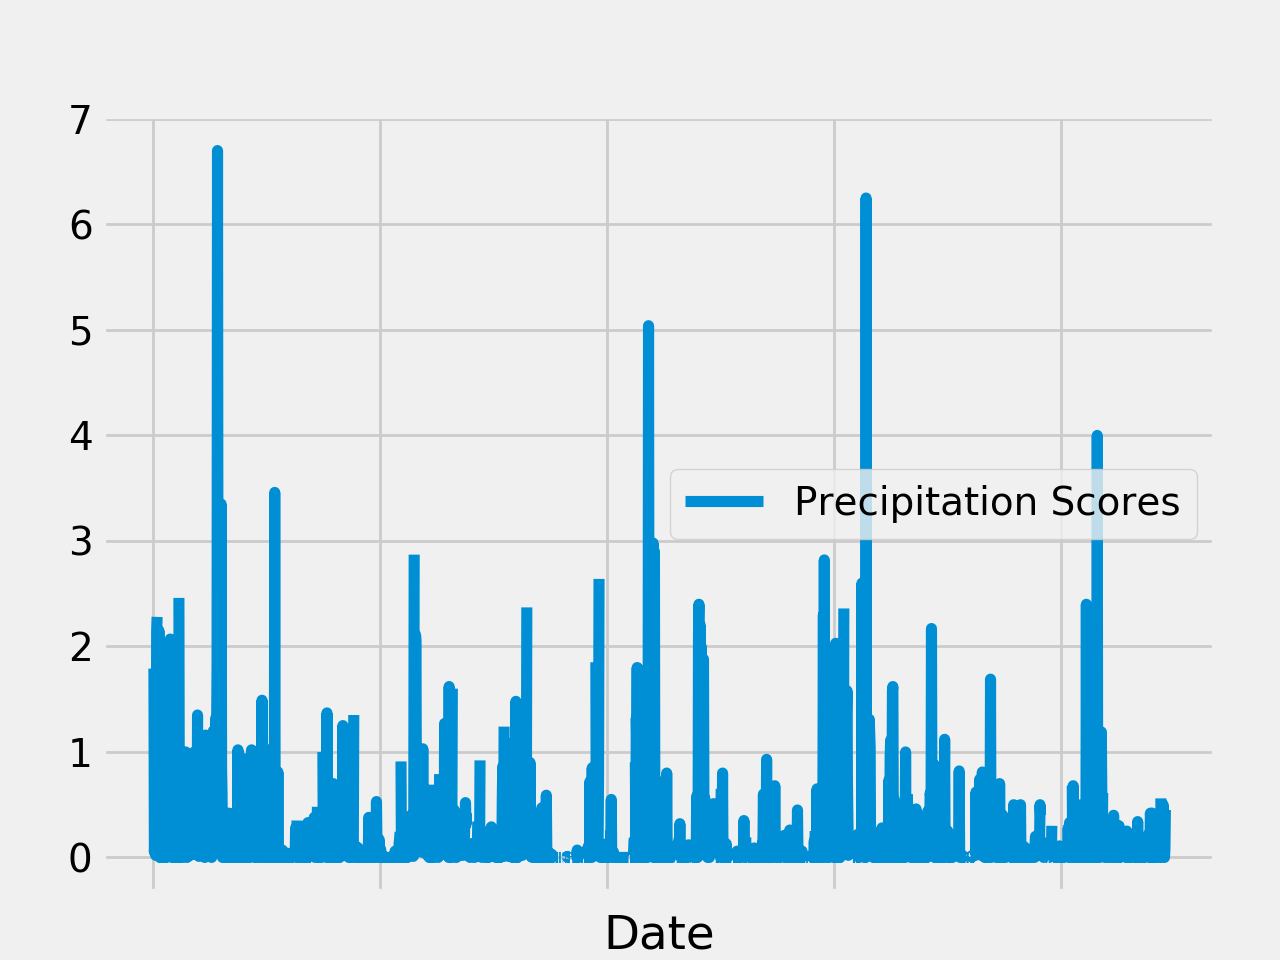

In [111]:
# Use Pandas Plotting with Matplotlib to plot the data
#Plot the results using the DataFrame plot method.
#bar chart df.plot

score_df.plot(x_compat = True)


In [112]:
# Use Pandas to calcualte the summary statistics for the precipitation data
score_df.describe()

,Precipitation Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [61]:
# How many stations are available in this dataset?
#use groupby.count
stations= session.query(Station)
for station in stations:
    
    print(station.name)


WAIKIKI 717.2, HI US
KANEOHE 838.1, HI US
KUALOA RANCH HEADQUARTERS 886.9, HI US
PEARL CITY, HI US
UPPER WAHIAWA 874.3, HI US
WAIMANALO EXPERIMENTAL FARM, HI US
WAIHEE 837.5, HI US
HONOLULU OBSERVATORY 702.2, HI US
MANOA LYON ARBO 785.2, HI US


In [62]:
#method 1 .count

Station_count1 = session.query(Station.station).count()
Station_count1

9

In [63]:
#method 1 gourpby, count
Station_count2 = session.query(Measurement).group_by(Measurement.station).count()
Station_count2
print(f"there are {Station_count2} stations available.")

there are 9 stations available.


In [64]:
# #method 3 func.count 
# from sqlalchemy import func
# Station_count3 = session.query(func.count(distinct(Measurement.station))).all()
# Station_count3

In [65]:
# What are the most active stations?
# 1. List the stations and the counts in descending order. how to add lable? 
stations_stat = session.query(Measurement.station, func.count(Measurement.date)).\
            group_by(Measurement.station).order_by(desc(func.count(Measurement.date))).all()
stations_stat

#how to use func.max??? what does "\" mean? 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# 2.Which station has the highest number of observations?
most_active_station = stations_stat[0][0]
print(f"the station that has the highest number of observations is : {most_active_station}.")


the station that has the highest number of observations is : USC00519281.


In [67]:
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#retrieve data from date and tobs columns, filter by date and station's name 

last_12months_temp = session.query(Measurement.date,Measurement.tobs).\
                    filter(and_(Measurement.date >= '2016-08-23', Measurement.station == most_active_station)).all()
last_12months_temp
# or data = session.query(Measurement).\
#     filter(and(Measurement.date >= '2016-08-23',, Measurement.station == most_active_station)
# temp_results = []
# for temp in data:
#     temp_results.append((row.date,row.tobs))
# print(temp_results)

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [68]:
temp_df = pd.DataFrame(last_12months_temp, columns = ["date", "temperature"])
temp_df.set_index('date')
temp_df.head()

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [69]:
temp_df.plot.hist(bins=12)


<IPython.core.display.Javascript object>

In [70]:
#Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station?
#func.min, func.max, func.avg, and func.count in your queries.
temp_stat = session.query(func.max(Measurement.tobs).label("max_temp"),func.min(Measurement.tobs).label("min_temp"),func.avg(Measurement.tobs).label("average_temp")).all()
lowest = temp_stat[0][1]
highest = temp_stat[0][0]
avg = temp_stat[0][2]
#temp_stat
print(f'the highest tempreture of station {most_active_station} is {highest}.')
print(f'the lowest tempreture of station {most_active_station} is {lowest}.')
print(f'the average tempreture of station {most_active_station} is {avg}.')


the highest tempreture of station USC00519281 is 87.0.
the lowest tempreture of station USC00519281 is 53.0.
the average tempreture of station USC00519281 is 73.09795396419437.


In [71]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [72]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# trip start date 2018-06-05, 5 days trip

trip_start_last_year = dt.date(2018, 6, 5) - dt.timedelta(days=365)
trip_end_last_year = dt.date(2018, 6, 5) - dt.timedelta(days=365) + dt.timedelta(days = 5)
print(trip_start_last_year)
print(trip_end_last_year)

#call function calc_temps
def calc_temps(trip_start_last_year, trip_end_last_year):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= trip_start_last_year).filter(Measurement.date <= trip_end_last_year).all()
print(calc_temps(trip_start_last_year, trip_end_last_year))
average_temp_trip = calc_temps(trip_start_last_year, trip_end_last_year)[0][1]
highest_temp_trip=calc_temps(trip_start_last_year, trip_end_last_year)[0][2]
lowest_temp_trip=calc_temps(trip_start_last_year, trip_end_last_year)[0][0]
average_temp_trip

2017-06-05
2017-06-10
[(72.0, 77.25, 81.0)]


77.25

<IPython.core.display.Javascript object>


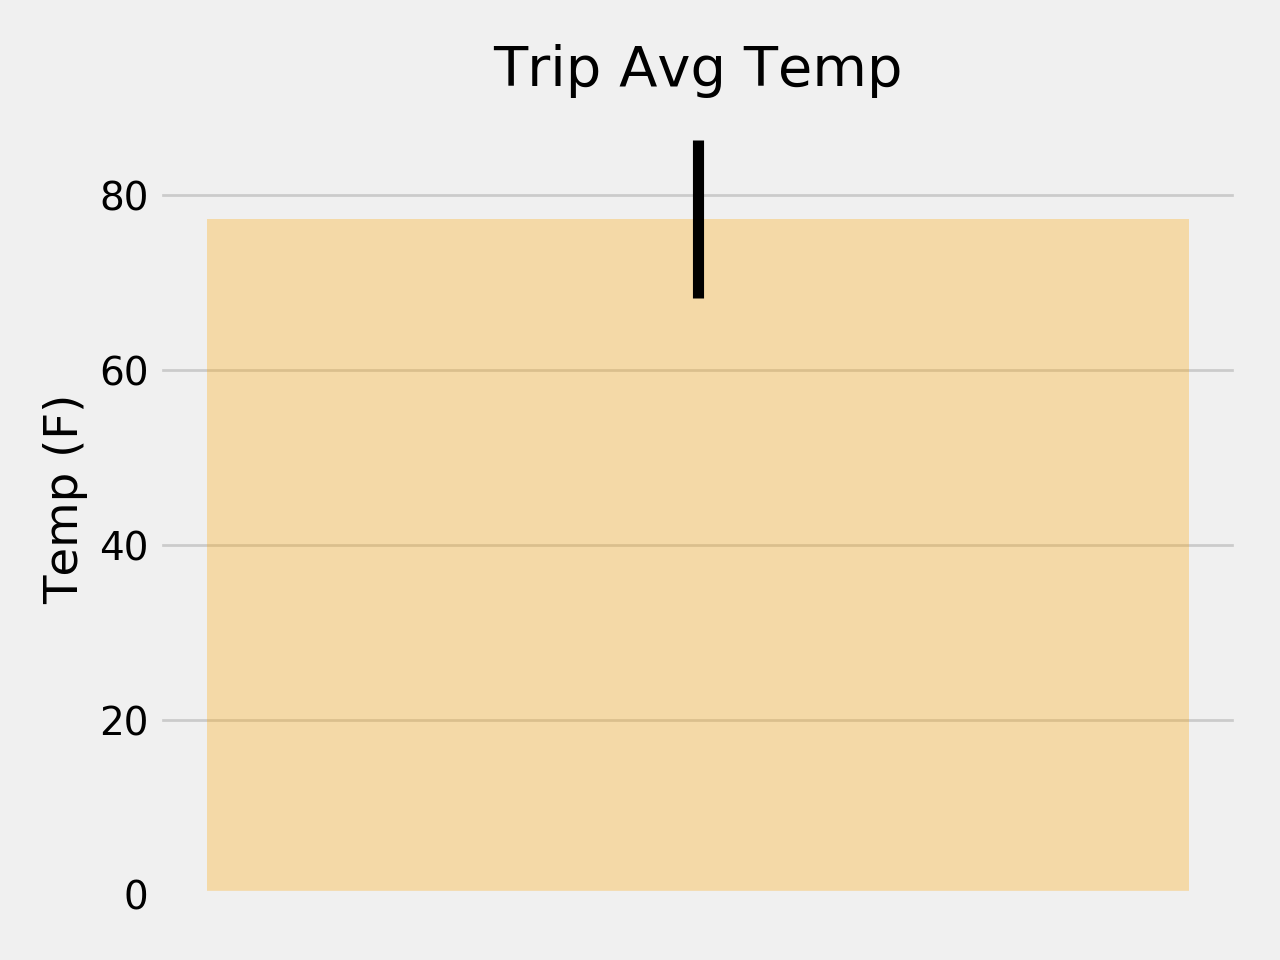

In [95]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


fig, ax = plt.subplots()
xpos = 1
bar = ax.bar(1, average_temp_trip, yerr=highest_temp_trip - lowest_temp_trip, alpha=0.3, color='orange', align="center")
ax.set(title="Trip Avg Temp", ylabel="Temp (F)",xticks=range(xpos), xticklabels="1")
fig.tight_layout()


In [96]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#groupby station, func.sum precipitation amount sel station, name, latitude, longitude, and elevation
#inner join! 
from pprint import pprint 

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

rainfall_per_station = session.query(*sel).\
                filter(and_(Measurement.date >= '2017-06-05',Measurement.date <= '2017-06-10', Measurement.station == Station.station)).\
                group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()

#pprint(rainfall_per_station) 
raifall_df = pd.DataFrame(rainfall_per_station, columns=['station', 'name', 'latitude','longitude','elevation','total prcp'])
raifall_df.set_index('station')

,name,latitude,longitude,elevation,total prcp
station,,,,,
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.69
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.56
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.25
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.13
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.04
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.02
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [97]:
# from pprint import pprint 

# sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]

# rainfall_per_station = session.query(*sel).\
#                 filter(and_(Measurement.date >= '2017-06-05',Measurement.date <= '2017-06-10',Station.station == 'USC00517948', Measurement.station == Station.station)).all()

# pprint(rainfall_per_station) 
# # raifall_df = pd.DataFrame(rainfall_per_station, columns=['station', 'name', 'latitude','longitude','elevation','total prcp'])
# # raifall_df.set_index('station')

## Optional Challenge Assignment

In [98]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
print(daily_normals("06-06"))

[(70.0, 75.17543859649123, 80.0)]


In [99]:
# calculate the daily normals for your trip

def daily_range_normals(start_date, end_date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(and_(func.strftime("%m-%d", Measurement.date) >= start_date, func.strftime("%m-%d", Measurement.date) <= end_date )).all()
    
yifeng = daily_range_normals("06-05","06-10")
# push each tuple of calculations into a list called `normals`
#normals = list(np.ravel(yifeng))
#normals


In [100]:

start_date = '2013-06-05'
end_date = '2013-06-10'
trip_range = pd.date_range(start_date, end_date)
trip_range2 = trip_range.strftime('%m-%d')
#trip2
normals = []
for date in trip_range2:
    normals.append(daily_normals(date)[0])
    
normals

[(68.0, 74.85454545454546, 81.0),
 (70.0, 75.17543859649123, 80.0),
 (68.0, 75.07142857142857, 81.0),
 (70.0, 75.58620689655173, 81.0),
 (69.0, 75.15254237288136, 81.0),
 (68.0, 75.14285714285714, 81.0)]

In [108]:
# Set the start and end date of the trip
start_date = '2013-06-05'
end_date = '2013-06-10'
# Use the start and end date to create a range of dates
import datetime

start = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.datetime.strptime(end_date, "%Y-%m-%d")
dates_generated = [ start + datetime.timedelta(days=x) for x in range(0, (end - start).days) ]
dates_generated


for date in dates_generated:
    print(date.strftime("%Y-%m-%d"))
#Stip off the year and save a list of %m-%d strings

dates = []
for date in dates_generated:
    dates.append(date.strftime("%m-%d"))

#Loop through the list of %m-%d strings and calculate the normals for each date
for date in dates:
    #print(date, daily_normals(date)[0][0],daily_normals(date)[0][1],daily_normals(date)[0][2])
    print(date, daily_normals(date))

2013-06-05
2013-06-06
2013-06-07
2013-06-08
2013-06-09
06-05 [(68.0, 74.85454545454546, 81.0)]
06-06 [(70.0, 75.17543859649123, 80.0)]
06-07 [(68.0, 75.07142857142857, 81.0)]
06-08 [(70.0, 75.58620689655173, 81.0)]
06-09 [(69.0, 75.15254237288136, 81.0)]


In [109]:
## Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
final = pd.DataFrame(normals, columns=['min tempreture', 'avg tempreture', 'max tempreture'])
final['date'] = trip_range
final.set_index(['date'],inplace=True)
final.head()

,min tempreture,avg tempreture,max tempreture
date,,,
2013-06-05,68.0,74.854545,81.0
2013-06-06,70.0,75.175439,80.0
2013-06-07,68.0,75.071429,81.0
2013-06-08,70.0,75.586207,81.0
2013-06-09,69.0,75.152542,81.0


<IPython.core.display.Javascript object>


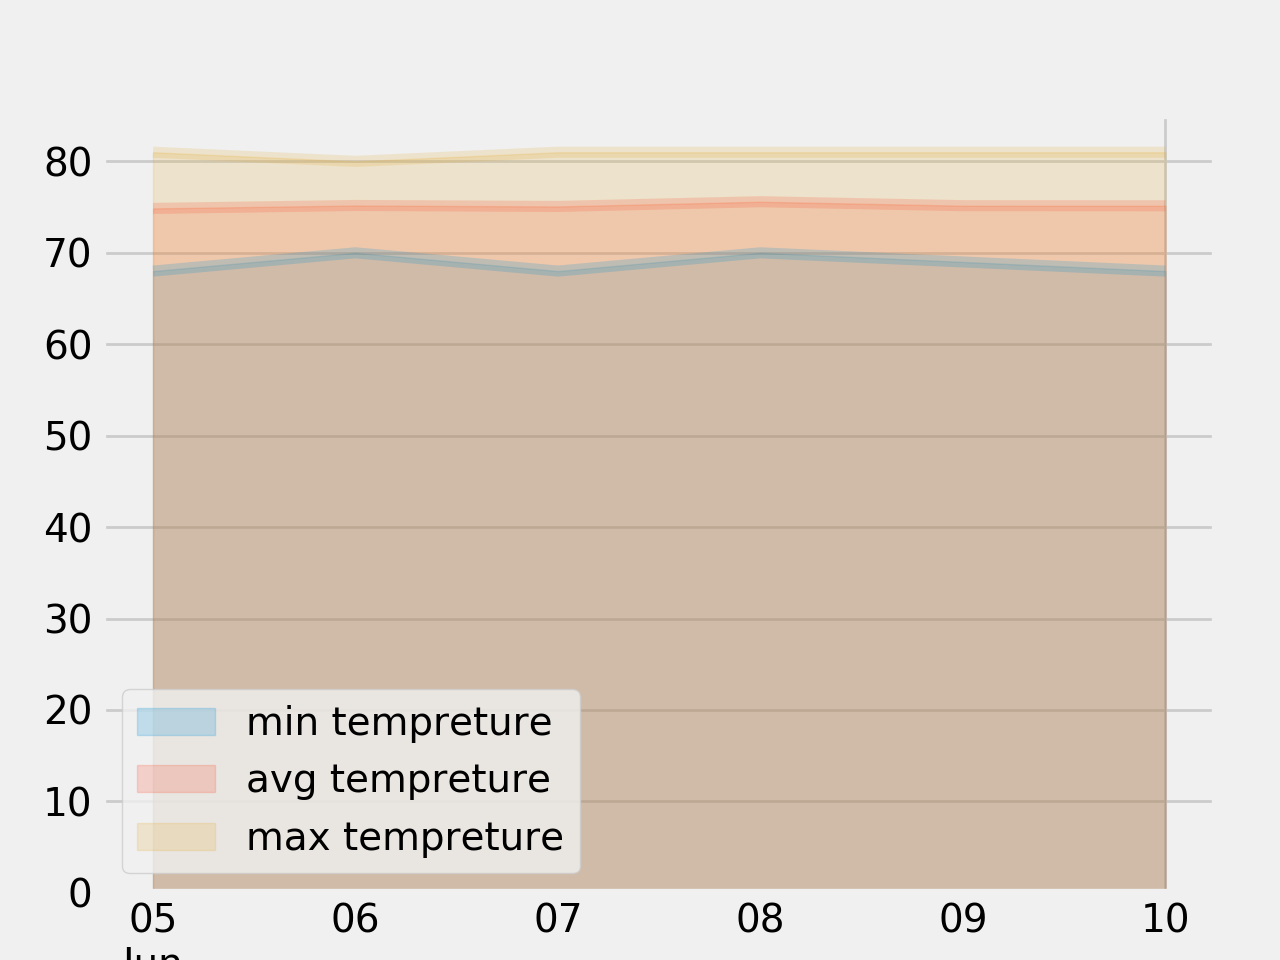

In [110]:
# Plot the daily normals as an area plot with `stacked=False`
final.plot(kind='area', stacked=False, alpha = 0.2)
